(454, 7)


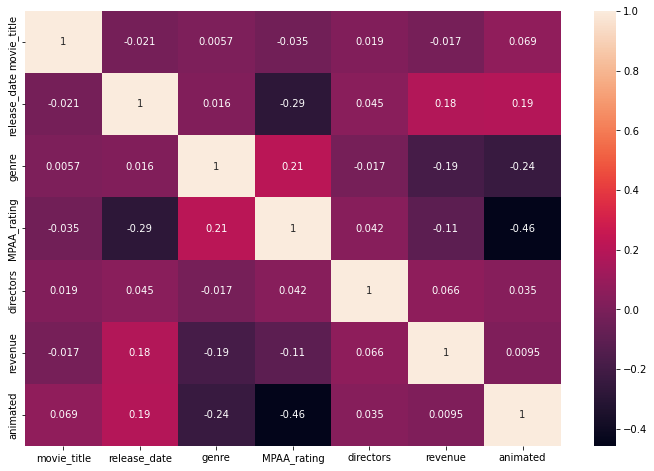

Mean Square Error Polynomial test =>  2.6200891807812665e+20
Mean Square Error Polynomial train =>  9.324673063642647e-07
############################################################################################
Mean Square Error ridge test =>  7799527636048.061
Mean Square Error ridge train => 3943103250614.565


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler


def Feature_Encoder(X,cols):
    for c in cols:
        lbl = LabelEncoder()
        lbl.fit(list(X[c].values))
        X[c] = lbl.transform(list(X[c].values))
           
    return X


data = pd.read_csv('datasets/[MERGED-COMPLETE]movies_revenue.csv')

#data cleaning
data.dropna(how='any',inplace=True)
data.drop(data.index[data['directors'] == 'Unknown'],inplace=True)
data['revenue'] = data['revenue'].str[1:].str.replace(',','').astype("float32").astype("int32")
data['release_date'] = pd.to_datetime(data['release_date'])
data['release_date'] = data['release_date'].view('int64')
print(data.shape)
cols=('movie_title','genre','MPAA_rating','directors', 'animated')
data = Feature_Encoder(data,cols)

X = data.iloc[:,0:] #Features
Y=data['revenue'] #Label

# Feature Selection
# Get the correlation between the features
movie_data = data.iloc[:,:]
corr = movie_data.corr()


top_feature = corr.index[abs(corr['revenue']) > 0.001]
# Correlation plot
plt.subplots(figsize=(12, 8))
top_corr = movie_data[top_feature].corr()
sns.heatmap(top_corr, annot=True)
plt.show()
top_feature = top_feature.delete(-1)
X = X[top_feature]

#feature scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20,shuffle=True,random_state=10)

poly_features = PolynomialFeatures(degree=6)

# transforms the existing features to higher degree features.
X_train_poly = poly_features.fit_transform(X_train)

# fit the transformed features to Linear Regression
poly_model = linear_model.LinearRegression()
poly_model.fit(X_train_poly, y_train)

# predicting on test data-set
prediction = poly_model.predict(poly_features.fit_transform(X_test))
prediction2 = poly_model.predict(poly_features.fit_transform(X_train))

print('Mean Square Error Polynomial test => ', metrics.mean_squared_error(y_test, prediction))
print('Mean Square Error Polynomial train => ', metrics.mean_squared_error(y_train, prediction2))
print("############################################################################################")


rdg = Ridge(alpha = 0.01 , normalize = True)
rdg.fit(X, Y)
prediction3 = rdg.predict(X_test)
print('Mean Square Error ridge test => ', metrics.mean_squared_error(y_test, prediction3))

prediction3 = rdg.predict(X_train)
print('Mean Square Error ridge train =>', metrics.mean_squared_error(y_train, prediction3))





In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler


def Feature_Encoder(X,cols):
    for c in cols:
        lbl = LabelEncoder()
        lbl.fit(list(X[c].values))
        X[c] = lbl.transform(list(X[c].values))
           
    return X


data = pd.read_csv('datasets/[MERGED-COMPLETE]movies_revenue.csv')

#data cleaning
data.dropna(how='any',inplace=True)
data.drop(data.index[data['directors'] == 'Unknown'],inplace=True)
data['revenue'] = data['revenue'].str[1:].str.replace(',','').astype("float32").astype("int32")
data['release_date'] = pd.to_datetime(data['release_date'])
data['release_date'] = data['release_date'].view('int64')
print(data.shape)
cols=('movie_title','genre','MPAA_rating','directors', 'animated')
data = Feature_Encoder(data,cols)

X = data.iloc[:,0:] #Features
Y=data['revenue'] #Label

# Feature Selection
# Get the correlation between the features
movie_data = data.iloc[:,:]
corr = movie_data.corr()


top_feature = corr.index[abs(corr['revenue']) > 0.001]
# Correlation plot
plt.subplots(figsize=(12, 8))
top_corr = movie_data[top_feature].corr()
sns.heatmap(top_corr, annot=True)
plt.show()
top_feature = top_feature.delete(-1)
X = X[top_feature]

#feature scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20,shuffle=True,random_state=10)

poly_features = PolynomialFeatures(degree=6)

# transforms the existing features to higher degree features.
X_train_poly = poly_features.fit_transform(X_train)

# fit the transformed features to Linear Regression
poly_model = linear_model.LinearRegression()
poly_model.fit(X_train_poly, y_train)

# predicting on test data-set
prediction = poly_model.predict(poly_features.fit_transform(X_test))
prediction2 = poly_model.predict(poly_features.fit_transform(X_train))

print('Mean Square Error Polynomial test => ', metrics.mean_squared_error(y_test, prediction))
print('Mean Square Error Polynomial train => ', metrics.mean_squared_error(y_train, prediction2))
print("############################################################################################")


rdg = Ridge(alpha = 0.01 , normalize = True)
rdg.fit(X, Y)
prediction3 = rdg.predict(X_test)
print('Mean Square Error ridge test => ', metrics.mean_squared_error(y_test, prediction3))

prediction3 = rdg.predict(X_train)
print('Mean Square Error ridge train =>', metrics.mean_squared_error(y_train, prediction3))





(454, 7)
Mean Square Error Polynomial test =>  4.781511141600287e+19
Mean Square Error Polynomial train =>  3.773598779950016e-08
############################################################################################
Mean Square Error ridge test =>  7786459815898.906
Mean Square Error ridge train => 3994268581691.581
